In [ ]:
!nvidia-smi

Tue Aug 13 13:30:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics
!pip install roboflow

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
!yolo task=detect mode=predict model=yolov10s.pt conf=0.25 source='https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg' save=True

100% 15.9M/15.9M [00:00<00:00, 128MB/s] 
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,096,880 parameters, 0 gradients, 24.8 GFLOPs

100% 336k/336k [00:00<00:00, 10.9MB/s]
image 1/1 /content/German-Shepherd-dog-Alsatian.jpg: 480x640 1 dog, 108.1ms
Speed: 15.8ms preprocess, 108.1ms inference, 156.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from IPython.display import display, Image

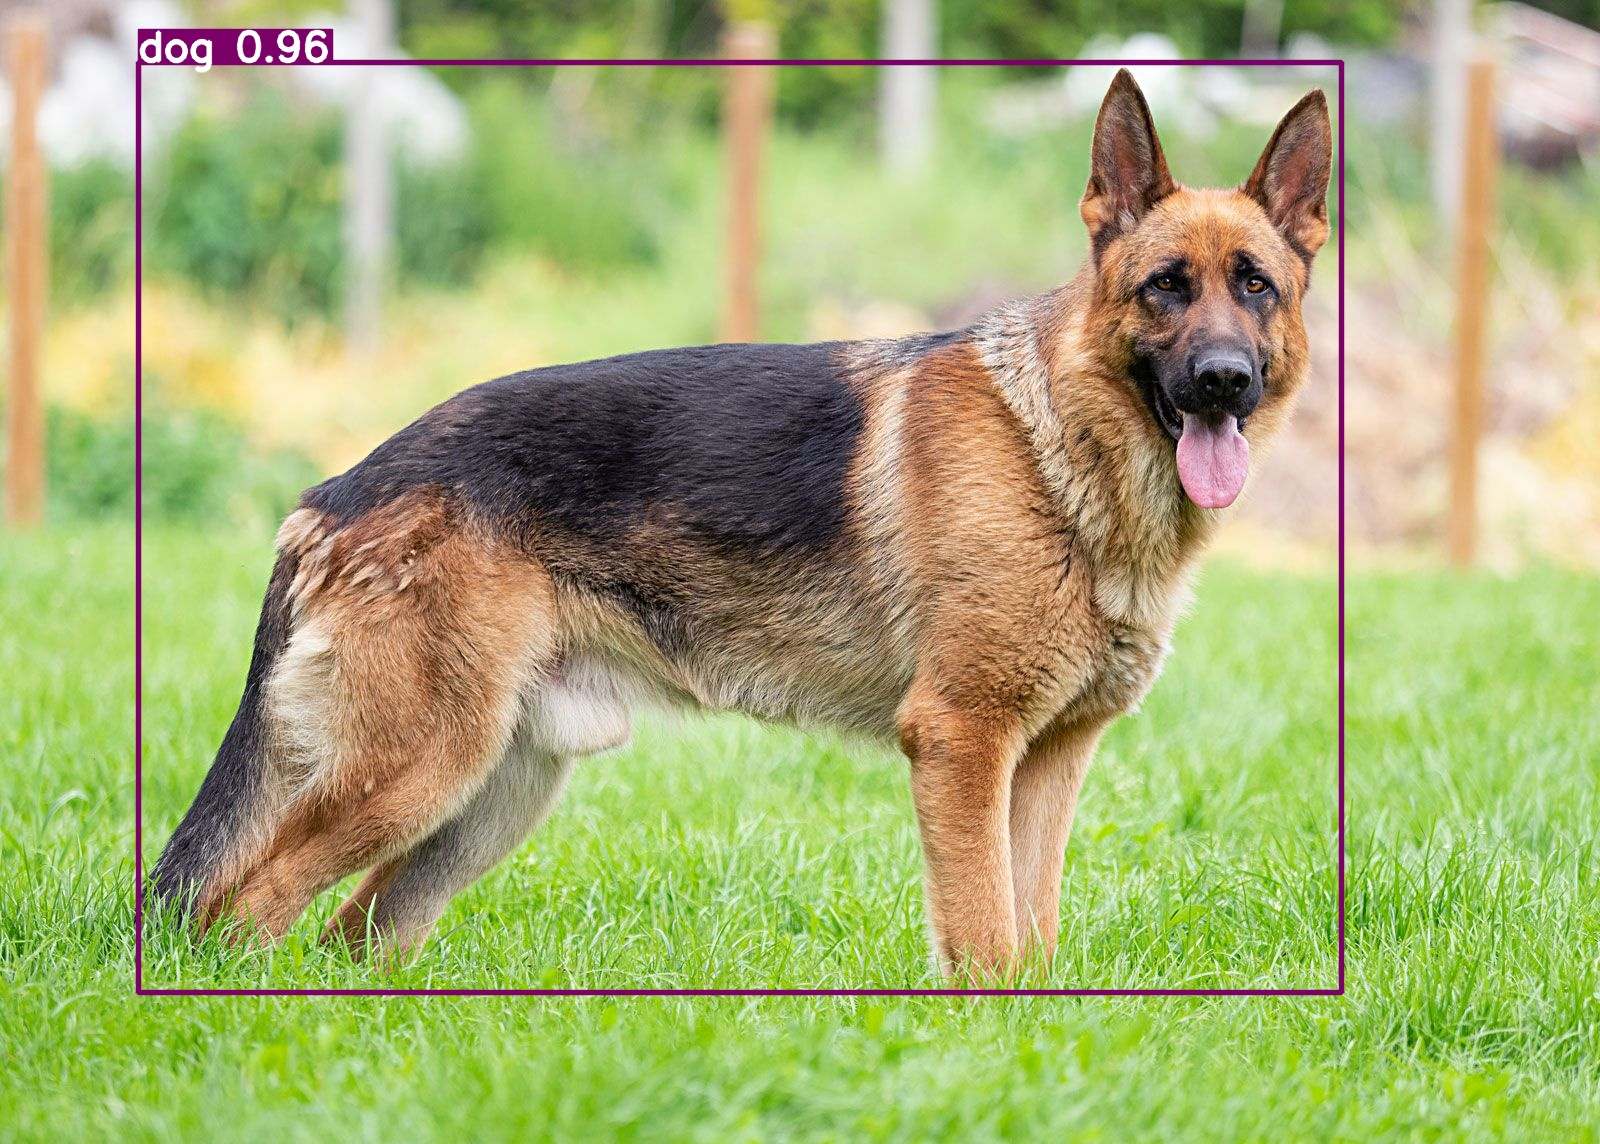

In [ ]:
Image(filename='runs/detect/predict/German-Shepherd-dog-Alsatian.jpg', height=600)

In [ ]:
from ultralytics import YOLO
!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="7eURY8AcDCeYje4J3FkO")
project = rf.workspace("truong-a6rzc").project("bien-bao-giao-thong-viet-nam-zalo1")
version = project.version(5)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.76, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to bien-bao-giao-thong-viet-nam-zalo1-5 in yolov8:: 100%|██████████| 9618/9618 [00:02<00:00, 3462.28it/s]


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!yolo task=detect mode=train model=yolov10s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/bien-bao-giao-thong-viet-nam-zalo1-5/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

/content


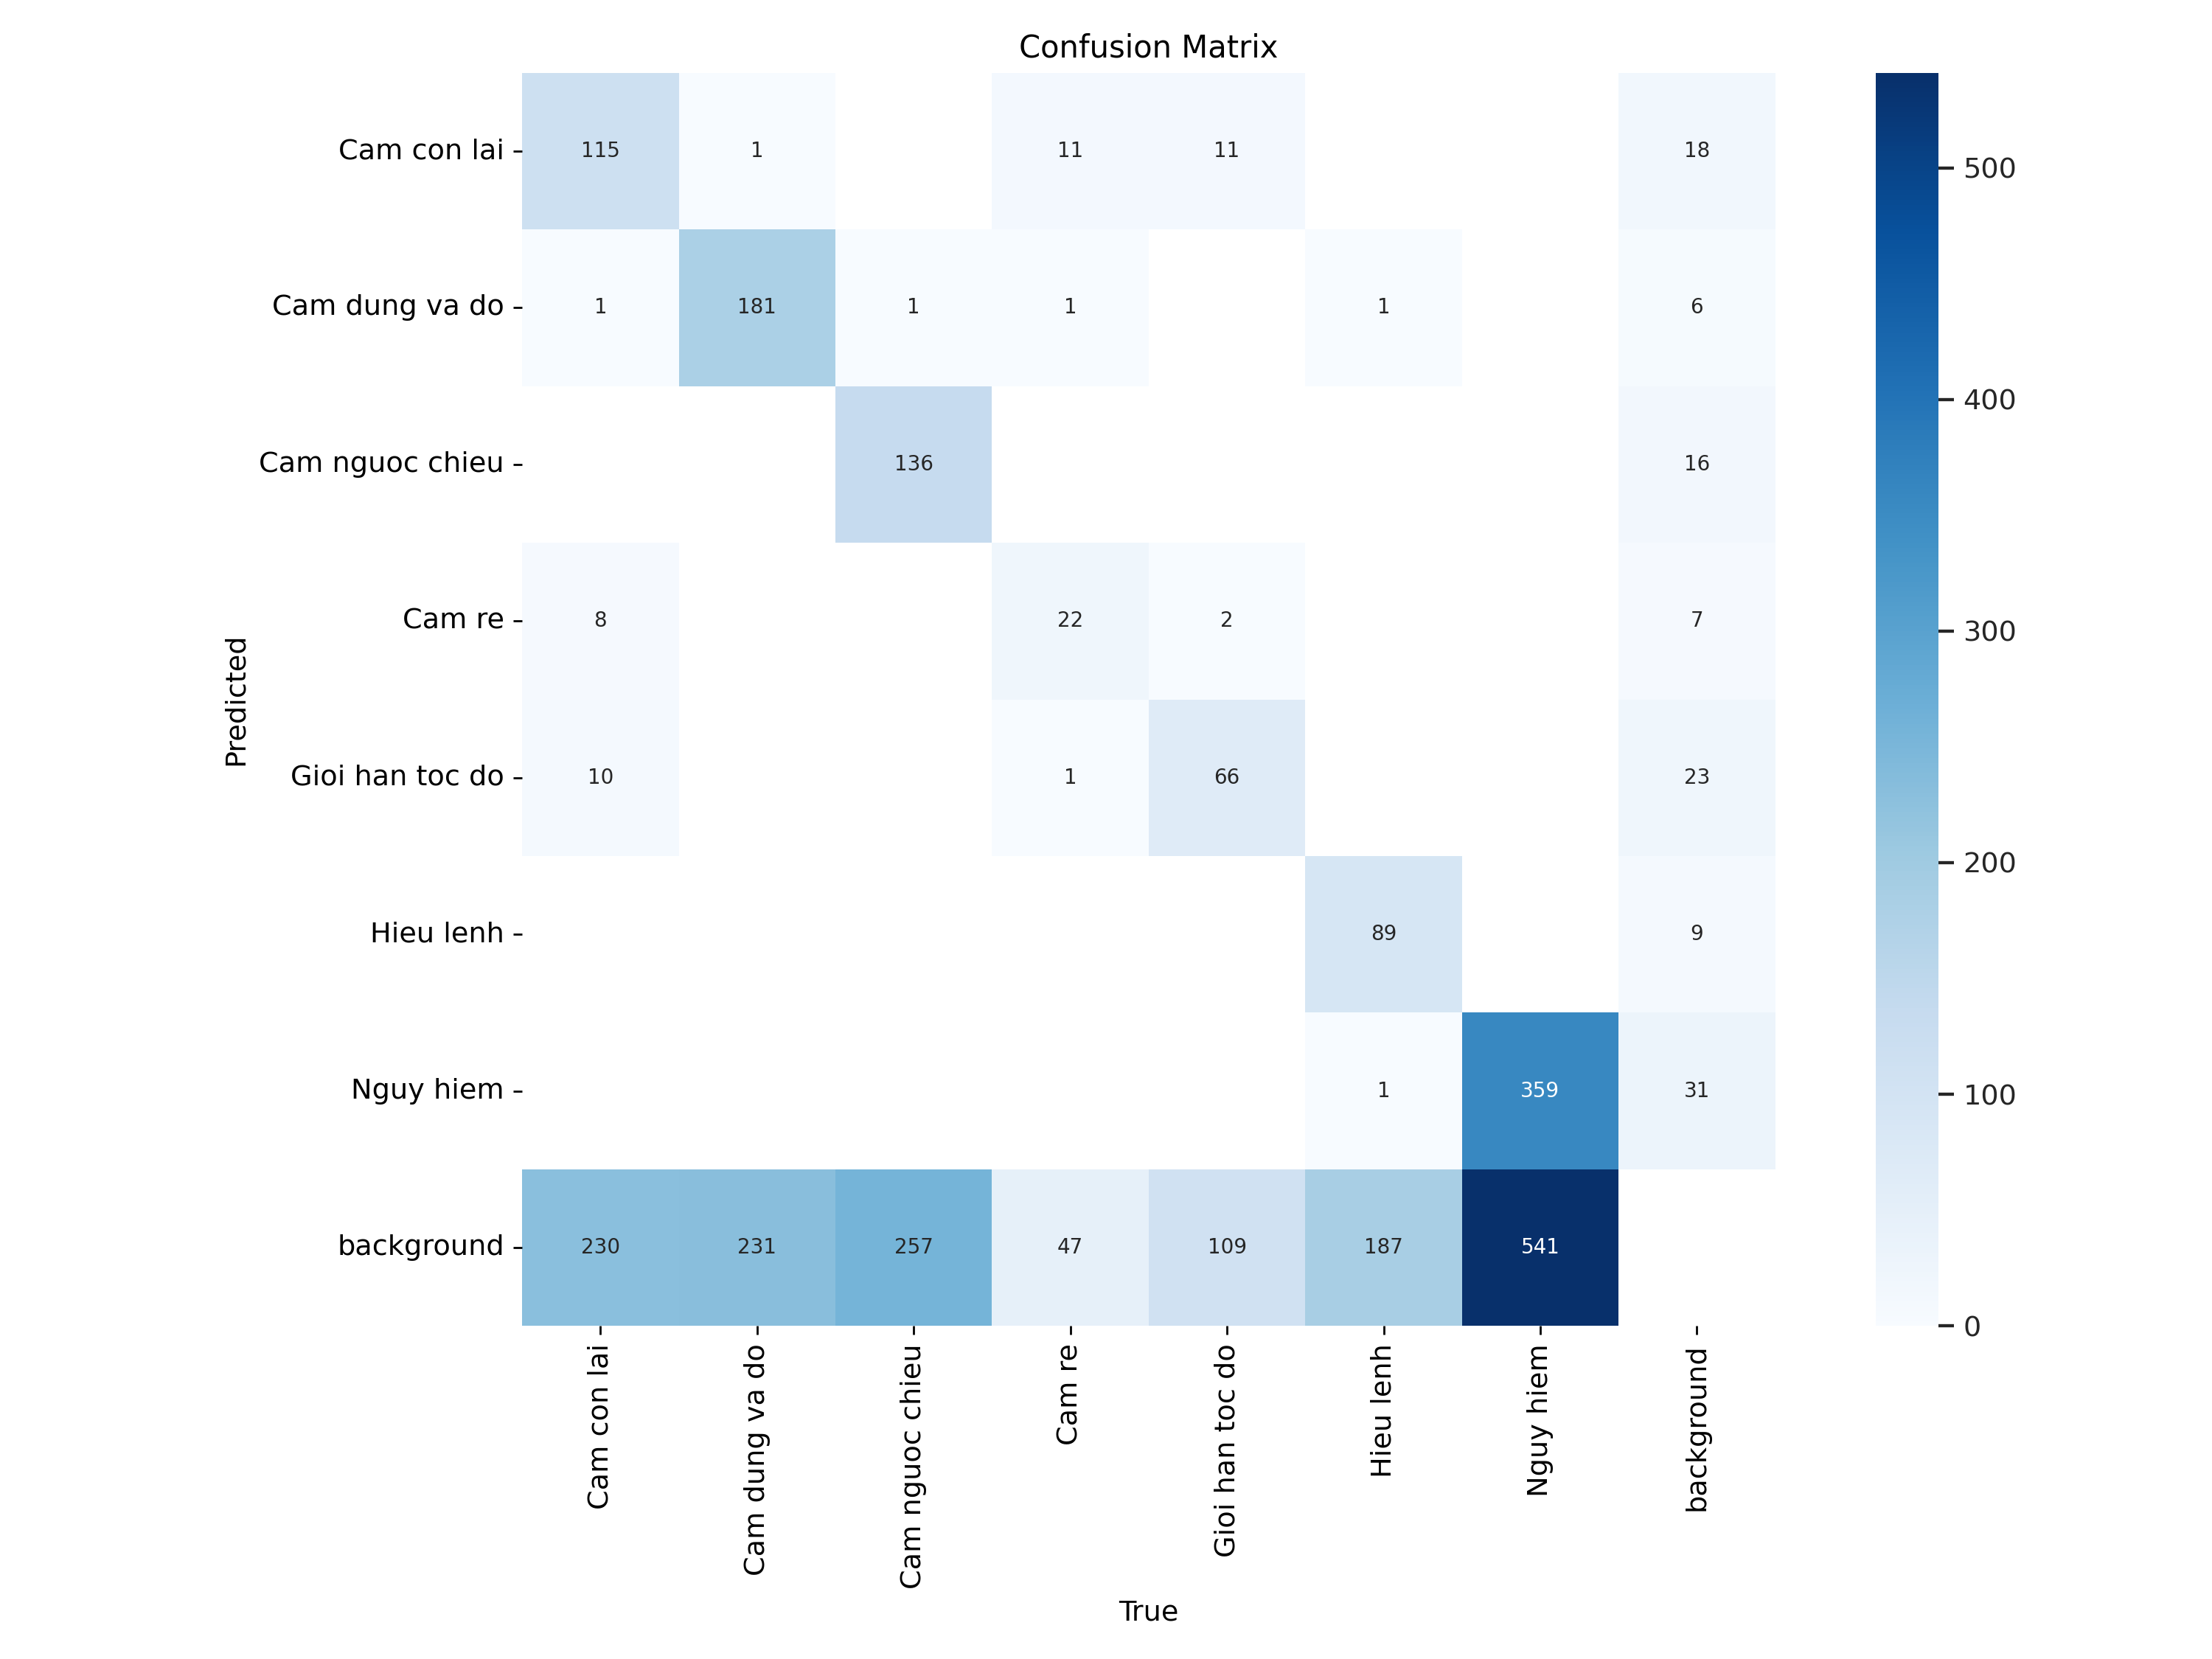

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


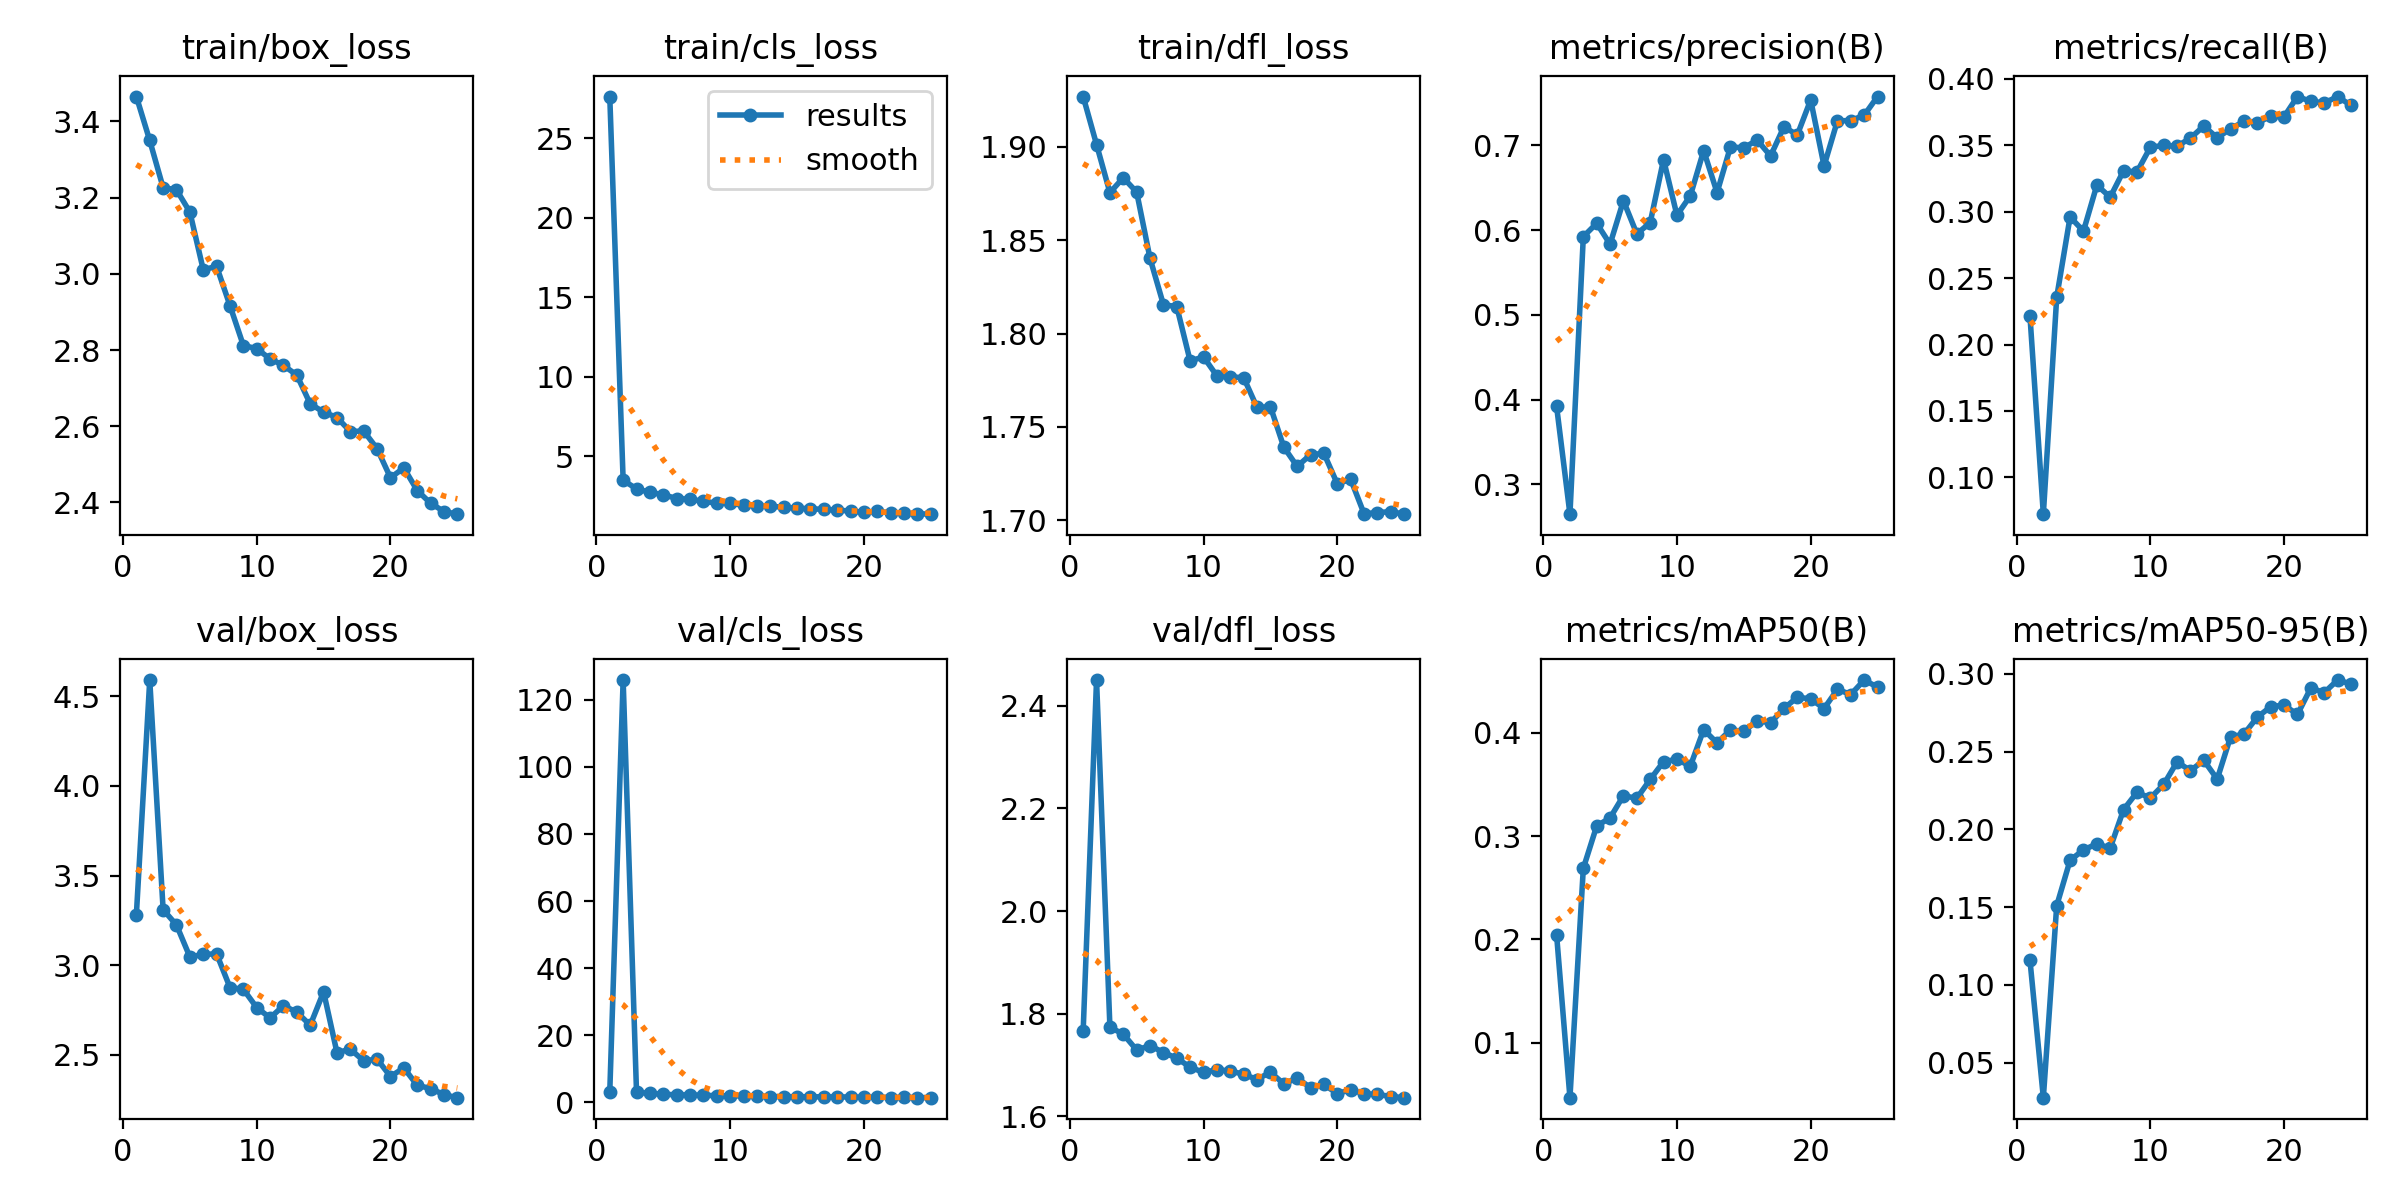

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


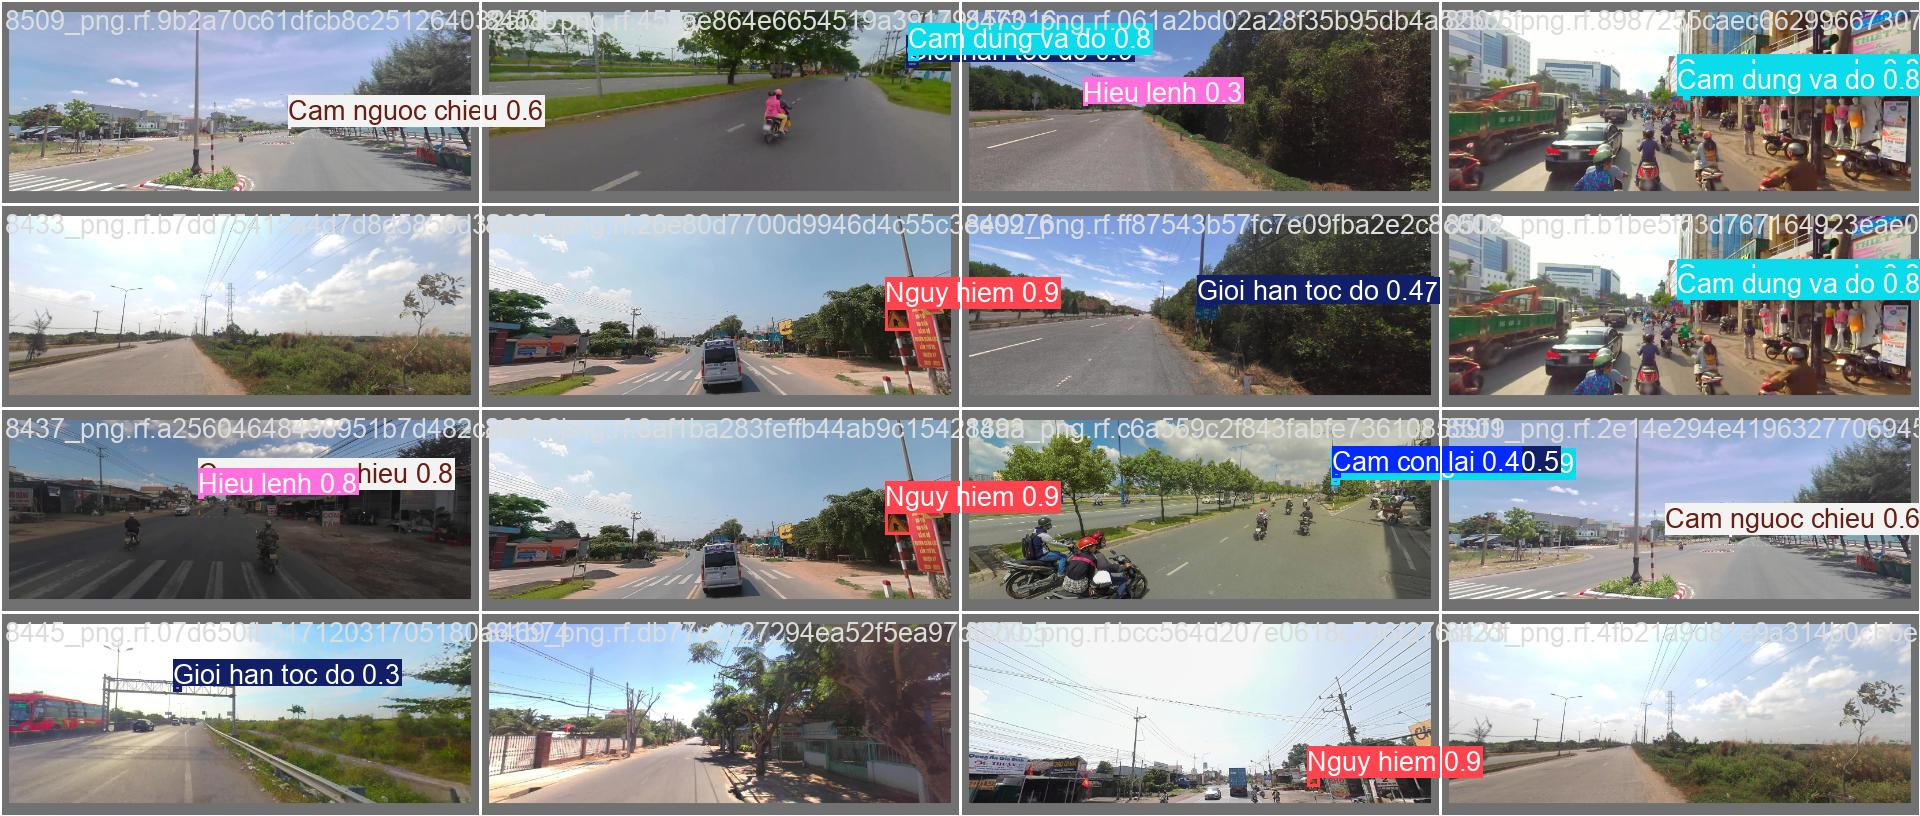

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,040,378 parameters, 0 gradients, 24.5 GFLOPs
val: Scanning /content/bien-bao-giao-thong-viet-nam-zalo1-5/valid/labels.cache... 926 images, 0 backgrounds, 0 corrupt: 100% 926/926 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/bien-bao-giao-thong-viet-nam-zalo1-5/valid/images/10006_png.rf.7b6f1dfcb018b6233ed0e49d57bc9717.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/bien-bao-giao-thong-viet-nam-zalo1-5/valid/images/10032_png.rf.934e63a75db404d1a39e46cd2619c185.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/bien-bao-giao-thong-viet-nam-zalo1-5/valid/images/10035_png.rf.d117cc0d5c89d5b8a7b4fdd441b29b25.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/bien-bao-giao-thong-viet-nam-zalo1-5/valid/images/10049_png.rf.89ed3bf36f8d197722b5e6aa09b65d0b.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/bien-bao-giao-thong-viet-nam-zal

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,040,378 parameters, 0 gradients, 24.5 GFLOPs

image 1/672 /content/bien-bao-giao-thong-viet-nam-zalo1-5/test/images/10002_png.rf.ccb1c6aa595c49630367a2a3b29c55af.jpg: 320x800 1 Nguy hiem, 99.9ms
image 2/672 /content/bien-bao-giao-thong-viet-nam-zalo1-5/test/images/10008_png.rf.346fc295434b29a4a0b2f859534a887d.jpg: 320x800 (no detections), 18.5ms
image 3/672 /content/bien-bao-giao-thong-viet-nam-zalo1-5/test/images/10024_png.rf.c6d936ad2e9de0a17166640787f0cf5f.jpg: 320x800 2 Nguy hiems, 14.2ms
image 4/672 /content/bien-bao-giao-thong-viet-nam-zalo1-5/test/images/10030_png.rf.f9e10615dafc9081159a7c607e574670.jpg: 320x800 1 Nguy hiem, 15.2ms
image 5/672 /content/bien-bao-giao-thong-viet-nam-zalo1-5/test/images/10033_png.rf.608f8ffd3b5a23e25005dcc2e7fbb816.jpg: 320x800 1 Nguy hiem, 13.6ms
image 6/672 /content/bien-bao-giao-thong-viet-nam-zalo1-5/test/image

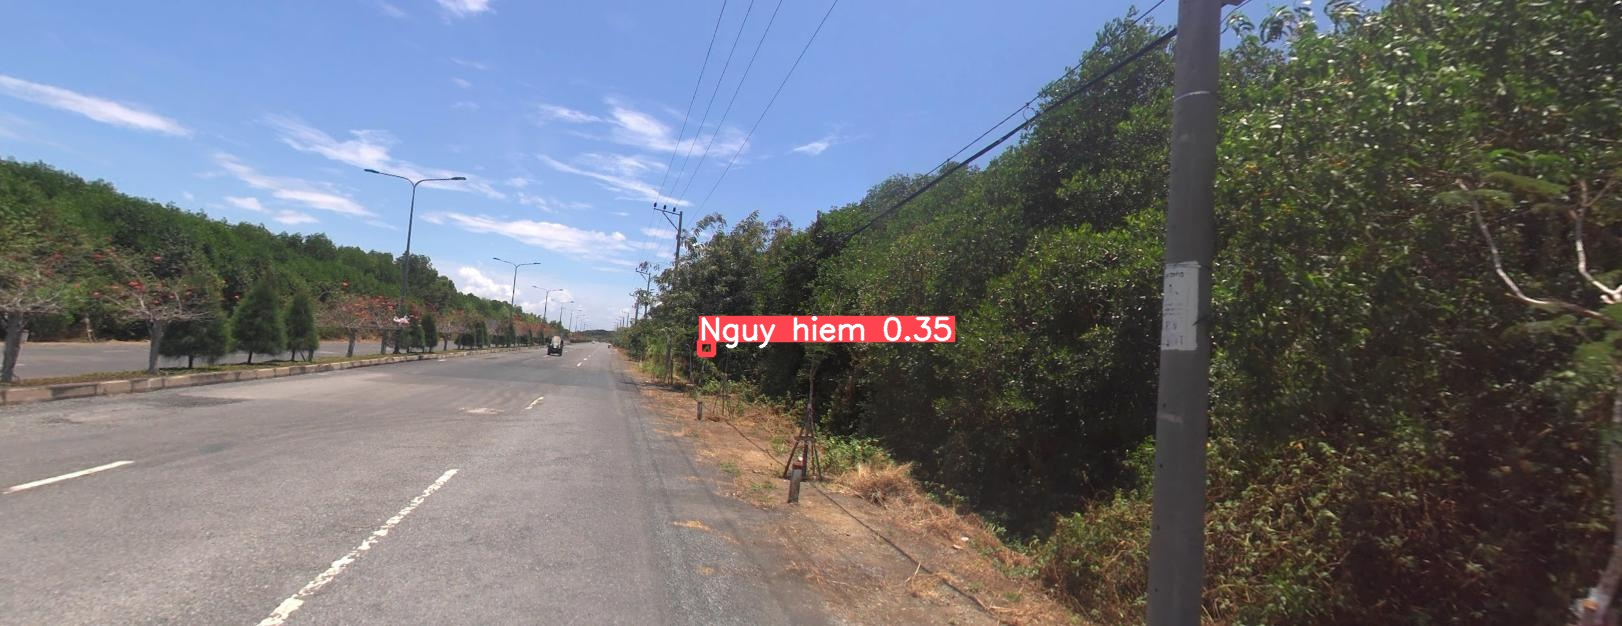

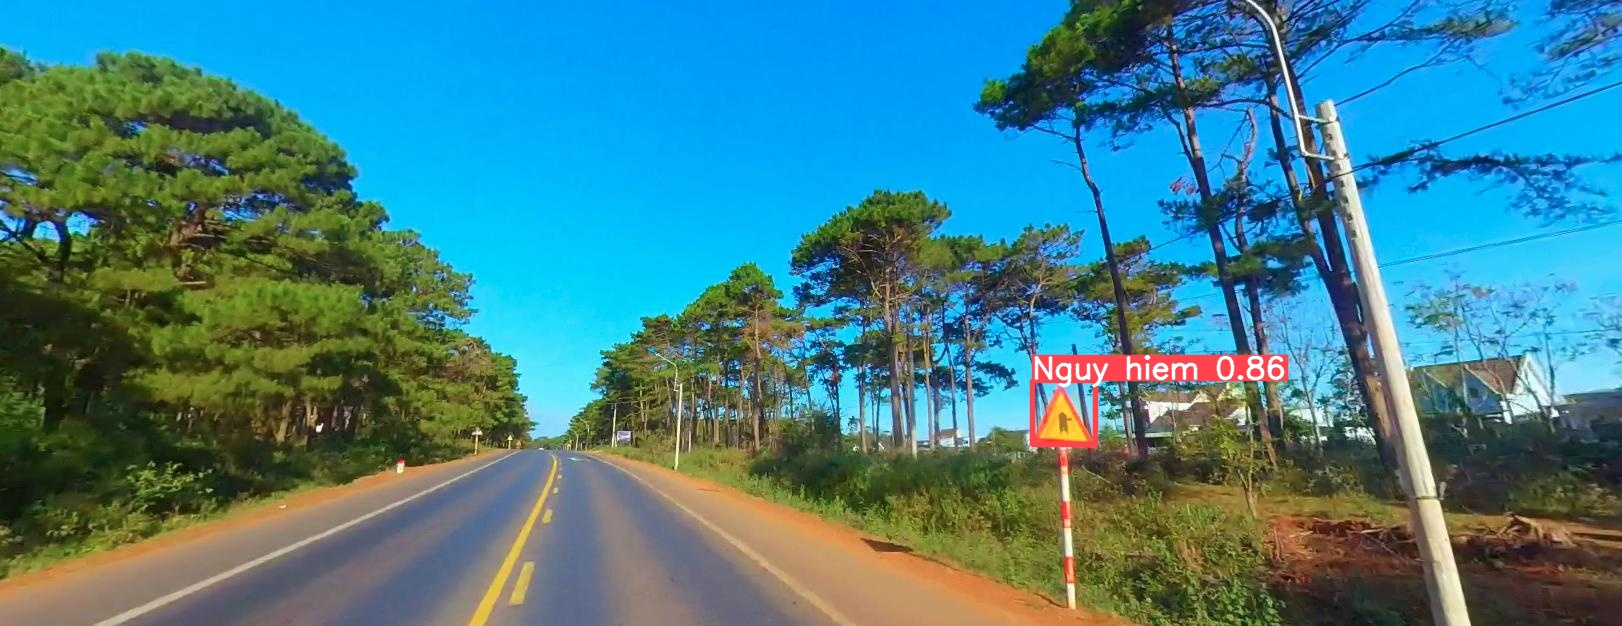

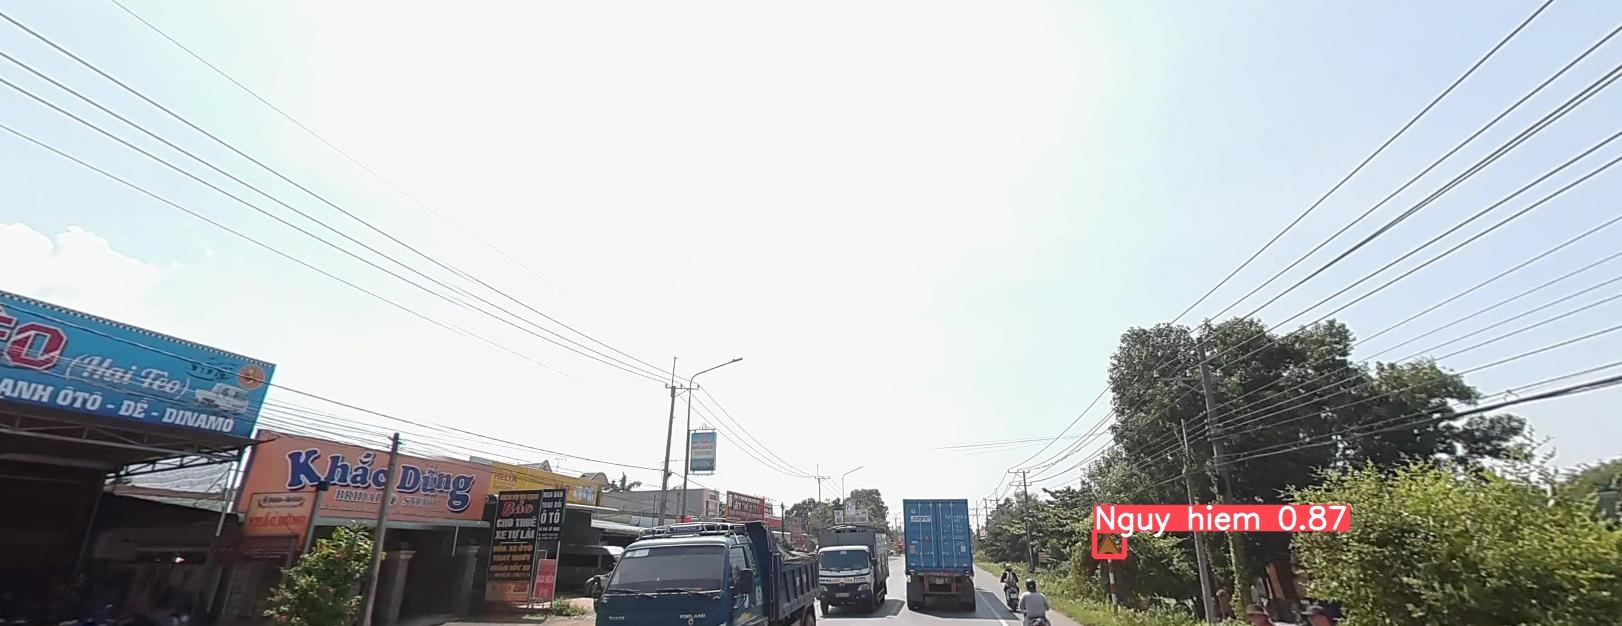

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

#Download models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r /content/runs.zip /content/runs

updating: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/F1_curve.png (deflated 9%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 20%)
  adding: content/runs/detect/val/R_curve.png (deflated 12%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/PR_curve.png (deflated 10%)
  adding: content/runs/detect/val/P_curve.png (deflated 7%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 23%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: cont

In [ ]:
!cp "/content/runs.zip" "/content/drive/MyDrive/"